download opendatasets package

In [10]:
#from IPython.display import clear_output
#!pip install opendatasets
#clear_output()

In [20]:
import os
import opendatasets as od
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

print(f"This notebook was ran on {dt.date.today()}.")

This notebook was ran on 2021-10-03.


download data

In [9]:
#download data to current directory using opendatasets lib
url='https://www.kaggle.com/shelvigarg/sales-forecasting-womart-store'

#get username from account in kaggle
#create new kaggle API token via personal account in kaggle
od.download(url)


Beginning file download...
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: constantina
Your Kaggle Key: ········


 46%|████▋     | 1.00M/2.16M [00:00<00:00, 6.33MB/s]

100%|██████████| 2.16M/2.16M [00:00<00:00, 10.1MB/s]

In [32]:
train = pd.read_csv('sales-forecasting-womart-store/TRAIN.csv')
train.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [48]:
#number of records and columns
train.shape

(188340, 10)

In [50]:
#column and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [53]:
train.describe(include="all")

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
count,188340,188340.000000,188340,188340,188340,188340,188340.000000,188340,188340.000000,188340.000000
unique,188340,NaN,4,5,4,516,NaN,2,NaN,NaN
top,T1164474,NaN,S1,L1,R1,2018-10-23,NaN,No,NaN,NaN
freq,1,NaN,88752,85140,63984,365,NaN,104051,NaN,NaN
mean,NaN,183.000000,NaN,NaN,NaN,NaN,0.131783,NaN,68.205692,42784.327982
std,NaN,105.366308,NaN,NaN,NaN,NaN,0.338256,NaN,30.467415,18456.708302
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,92.000000,NaN,NaN,NaN,NaN,0.000000,NaN,48.000000,30426.000000
50%,NaN,183.000000,NaN,NaN,NaN,NaN,0.000000,NaN,63.000000,39678.000000
75%,NaN,274.000000,NaN,NaN,NaN,NaN,0.000000,NaN,82.000000,51909.000000


In [ ]:
### aggregated sales

In [33]:
#aggregate sales and plot (what we will try to forecast initially)
sales_date_agg = train.groupby(by='Date', as_index=False, sort=True)['Sales'].agg('sum')
sales_date_agg.head(5)

,Date,Sales
0,2018-01-01,15345484.5
1,2018-01-02,19592415.0
2,2018-01-03,18652527.0
3,2018-01-04,19956267.0
4,2018-01-05,22902651.0


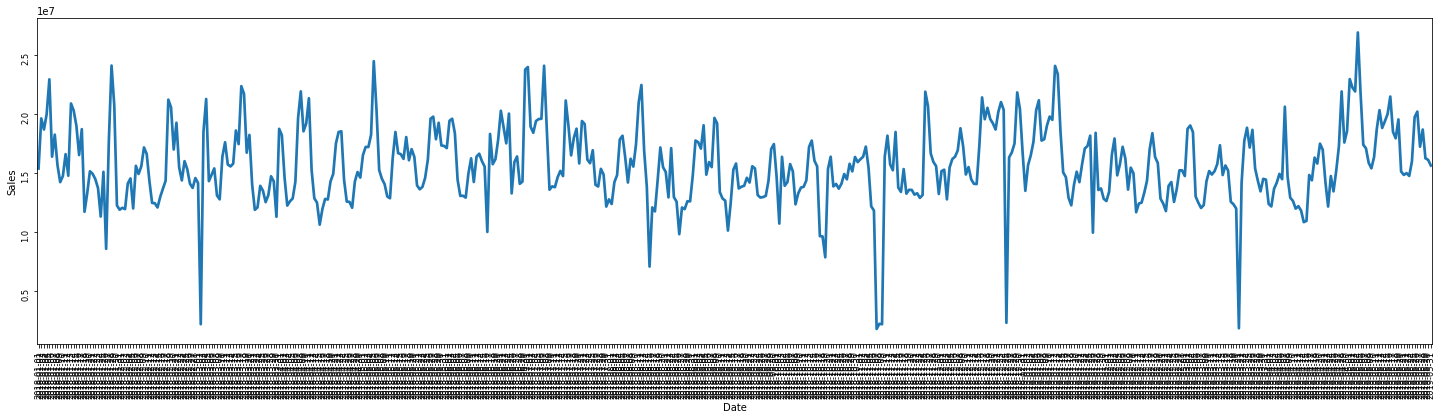

In [42]:
#plot sales time series
fig, ax = plt.subplots(figsize=(25,6));
sns.pointplot(x='Date', y='Sales', data=sales_date_agg, ci=None, markers='', ax=ax);
ax.tick_params(rotation=90, labelsize='small');
plt.show()